# house prices explorary data analysis 

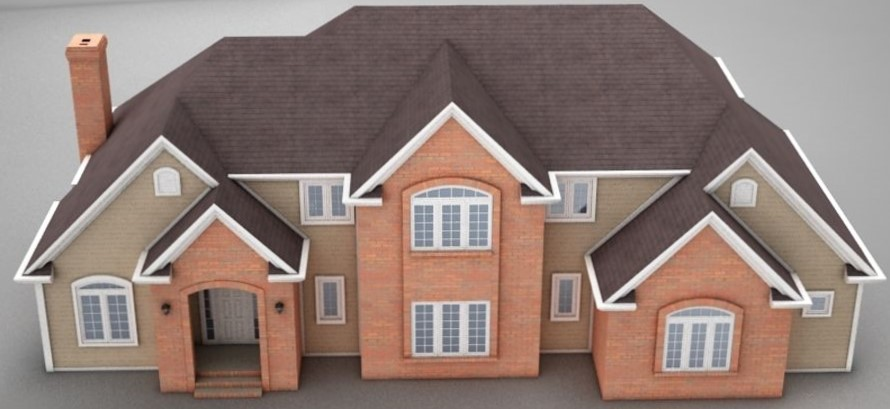

1 Executive Summary
2 Introduction
3 Loading and Exploring Data
3.1 Loading libraries required and reading the data into R
3.2 Data size and structure
4 Exploring some of the most important variables
4.1 The response variable; SalePrice
4.2 The most important numeric predictors
4.2.1 Correlations with SalePrice
4.2.2 Overall Quality
4.2.3 Above Grade (Ground) Living Area (square feet)
5 Missing data, label encoding, and factorizing variables
5.1 Completeness of the data
5.2 Imputing missing data
5.3 Label encoding/factorizing the remaining character variables
5.4 Changing some numeric variables into factors
5.4.1 Year and Month Sold
5.4.2 MSSubClass
6 Visualization of important variables
6.1 Correlations again
6.2 Finding variable importance with a quick Random Forest
6.2.1 Above Ground Living Area, and other surface related variables (in square feet)
6.2.2 The most important categorical variable; Neighborhood
6.2.3 Overall Quality, and other Quality variables
6.2.4 The second most important categorical variable; MSSubClass
6.2.5 Garage variables
6.2.6 Basement variables
7 Feature engineering
7.1 Total number of Bathrooms
7.2 Adding ‘House Age’, ‘Remodeled (Yes/No)’, and IsNew variables
7.3 Binning Neighborhood
7.4 Total Square Feet
7.5 Consolidating Porch variables
8 Preparing data for modeling
8.1 Dropping highly correlated variables
8.2 Removing outliers
8.3 PreProcessing predictor variables
8.3.1 Skewness and normalizing of the numeric predictors
8.3.2 One hot encoding the categorical variables
8.3.3 Removing levels with few or no observations in train or test
8.4 Dealing with skewness of response variable
8.5 Composing train and test sets
9 Modeling
9.1 Lasso regression model
9.2 XGBoost model
9.3 Averaging predictions

### Introduction
This is my first Kaggle for the House Prices competition. I started this contest both as data science enthusiast and real estate appraisal enthusiast. I want to develop my project over time and benefit myself in this regard. I start with EDA. I hope other enthusiasts will enjoy my work.

**Kaggle describes this competition as follows:**

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Import some usefull libraries.

In [1]:
import matplotlib.pyplot as plt
#import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#sns.set(style="whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

### Load dataset and take a brief look.

In [2]:
prices = pd.read_csv('dataset/price.csv')
prices.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
df= prices.copy()

In [4]:
df.info(verbose=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


### Examination of the response variable


In [5]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 **Super! I think I have correctly set my response variable to focus on. It has a pretty good statistic, without any null value.**

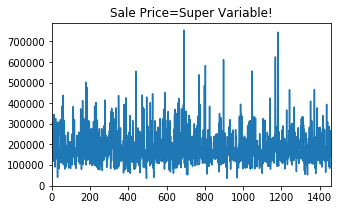

In [6]:
Super= df['SalePrice']
Super.plot(title="Sale Price=Super Variable!",figsize=(5,3));

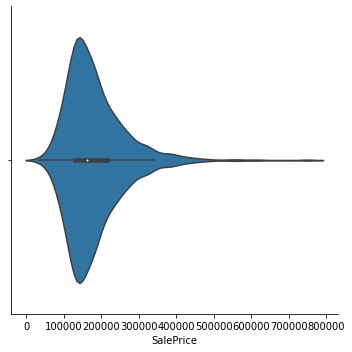

In [7]:
sns.catplot(x="SalePrice", kind="violin",data=df);

I guess you may need to make a lot of effort when you start dating with a super variable. We can not pass without seeing that there is a lot of value between 150000 and 200000. 

Our variable looks great with this graphic representation. Now he is ready to party and can call his friends. I hope they will all join the full party.

In [8]:
print("**Checking the columns in the dataset.**")
len(df.columns), df.columns

**Checking the columns in the dataset.**


(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

Dataframe has 81 columns (79 features + id + target features) and 1459 entries
There is lots of info that is probably related to the SalePrice like the area, the neighborhood, the condition and quality.
Maybe other features are not so important for predicting the target, also there might be a strong correlation for some of the features (like GarageCars and GarageArea). For some columns many values are missing: only 7 values for Pool QC in df.

### Examination of categorical variables

In [9]:
category= df.select_dtypes(include="object")
cols= category.columns

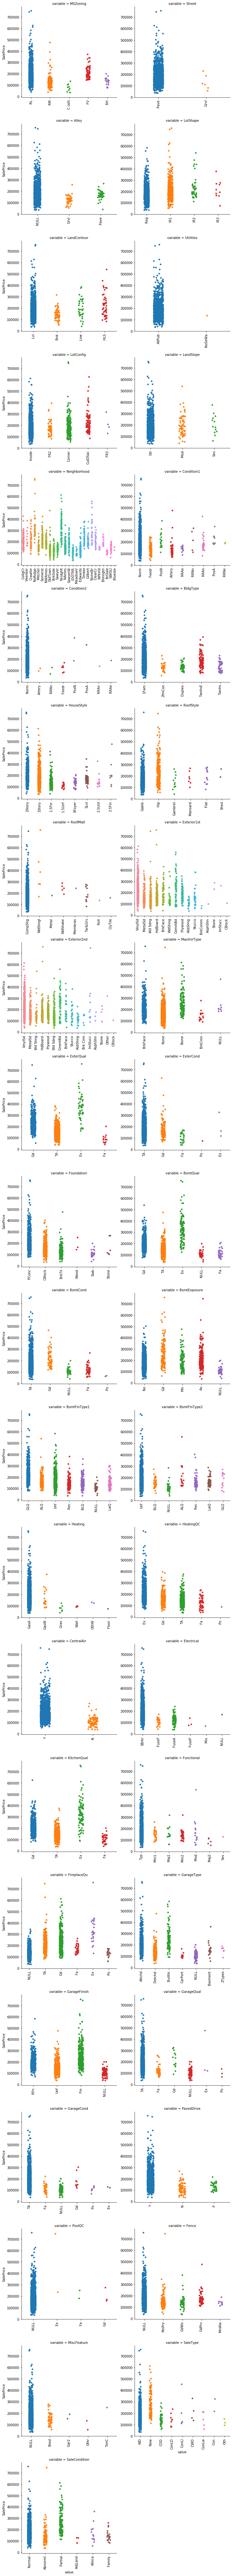

In [10]:
for c in category:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['NULL'])
        df[c] = df[c].fillna('NULL')

def stripplot(x, y, **kwargs):
    sns.stripplot(x=x, y=y, jitter=True)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=category)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(stripplot, "value", "SalePrice")

In [11]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NULL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NULL,NULL,NULL,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


The fact that there are so many missing values in our dataset seems quite disturbing for us. However, it is clear from the graphs that there are clusters of certain values and effects on prices comfortably.

### Examination of numerical variables

In [12]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


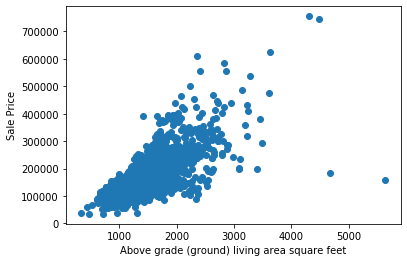

In [14]:
plt.scatter(x=df['GrLivArea'], y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

I guessed that house prices might have high correlation with living space. This was a good demonstration. An outcome suitable for instinct came about. I am sure we will have more work in the future with this variable.

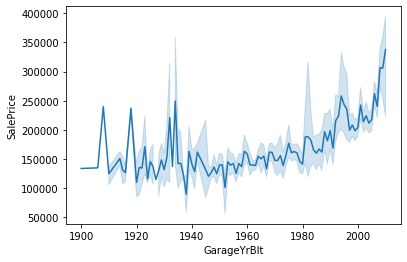

In [15]:
sns.lineplot(x = "GarageYrBlt", y = "SalePrice", data = df);

From this timeline, we see beautifully that house prices are related to the year of construction of the garage. However, we can also find that this is partly misleading for some reason. Perhaps we should examine with the years of construction of the houses.

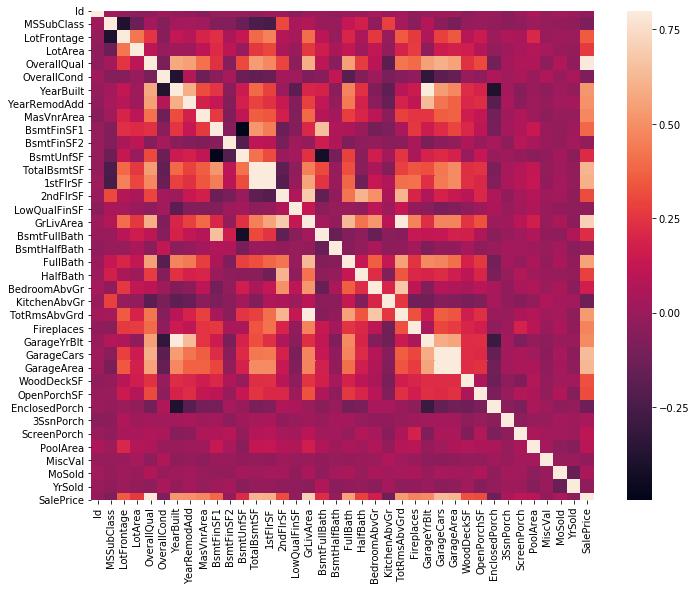

In [16]:
# Complete numerical correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

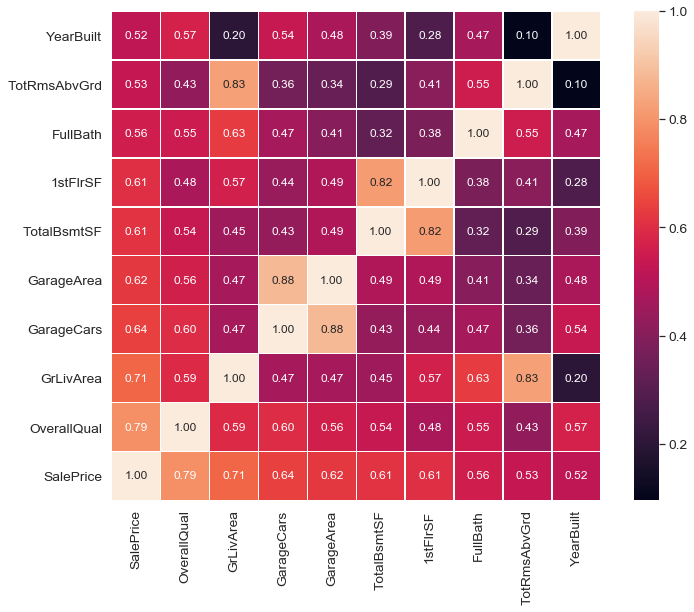

In [17]:
# saleprice correlation matrix
corr_num = 10 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(df[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True,  linewidths = .5, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.ylim(0,10)
plt.show()

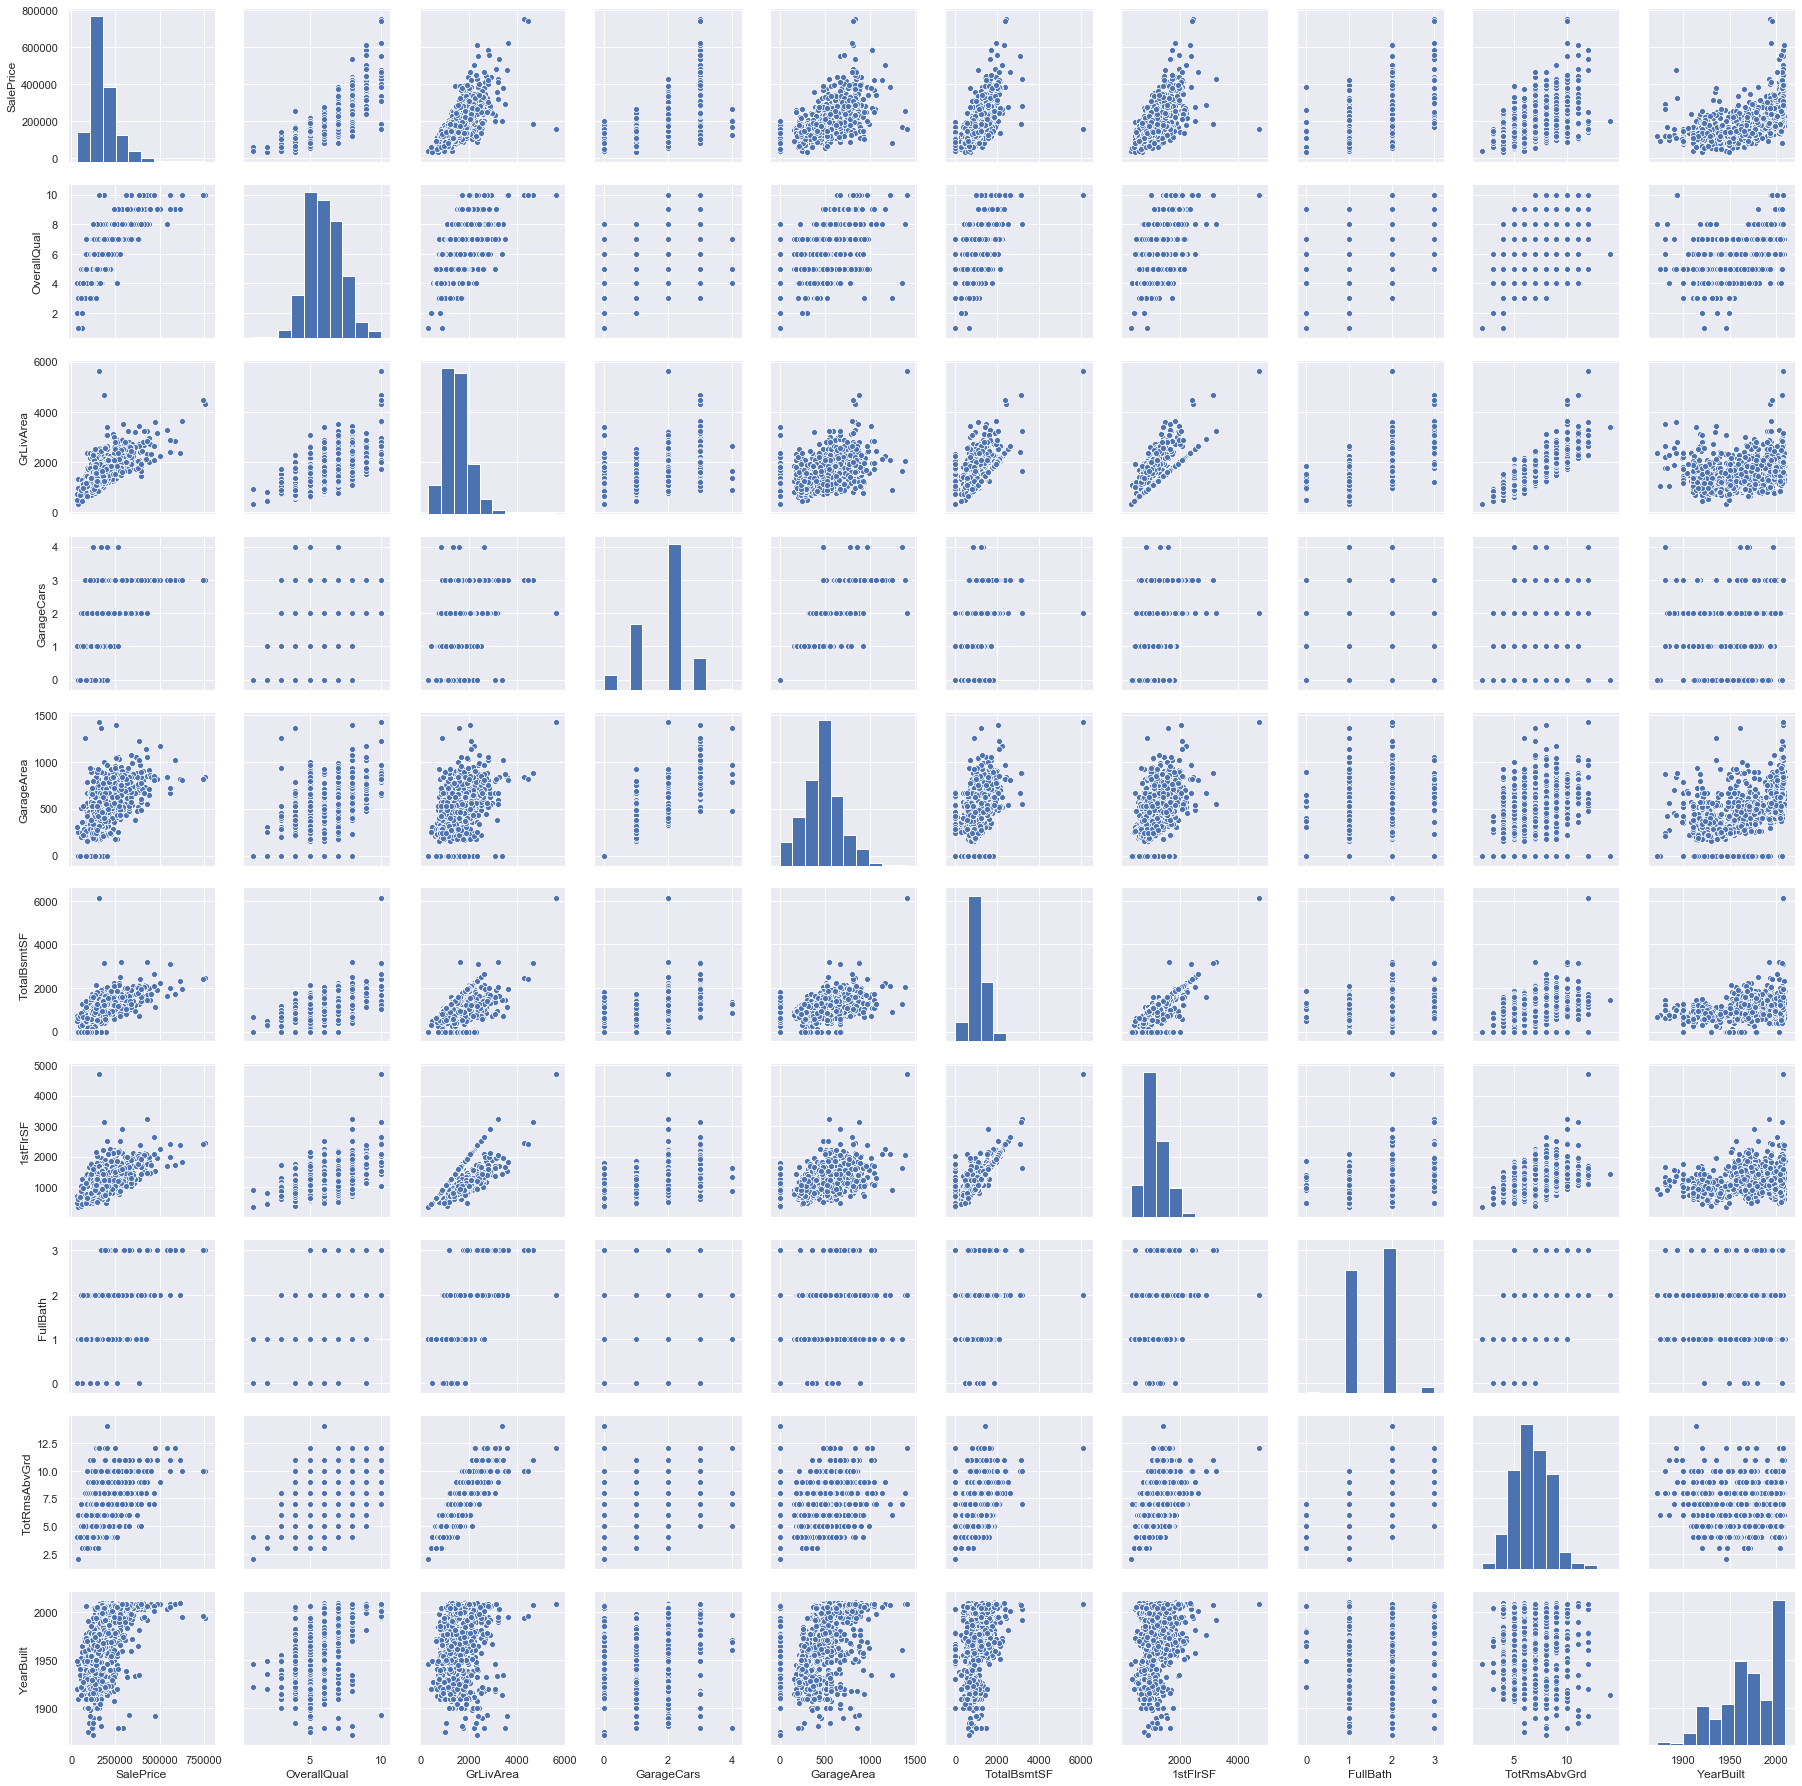

In [18]:
# pair plots for variables with largest correlation
var_num = 10
vars = cols_corr[0:var_num]
sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[vars], size = 2.5)
plt.show();

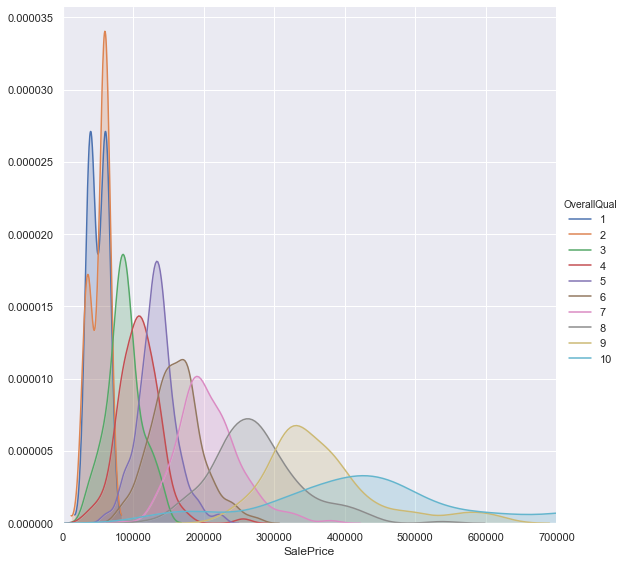

In [32]:
(sns
 .FacetGrid(df,
              hue = "OverallQual",
              height = 8,
              xlim = (0, 700000))
 .map(sns.kdeplot, "SalePrice", shade= True)
 .add_legend()
);

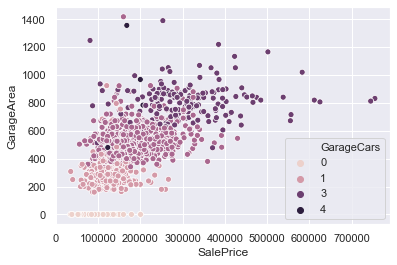

In [35]:
sns.scatterplot(x = "SalePrice", y = "GarageArea", hue = "GarageCars",  data = df);

In [21]:
df.groupby(["OverallQual"])["SalePrice"].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [ ]:
df.groupby(["GarageCars"])["SalePrice"].mean()

In [ ]:
colss= prices.columns
null_list=[]
for s in colss :
    if (df[s].isnull().sum()/1460*100)>10:
        null_list.append(s)
print(null_list)

In [ ]:
colss= prices.columns
full_list=[]
for s in colss :
    if df[s].value_counts().max()/1460*100>90:
        full_list.append(s)
print(full_list)

In [ ]:
df['Alley'].value_counts().max()

In [ ]:
categoricals.describe()

In [ ]:
categoricals.isnull().sum()

In [ ]:
sns.stripplot(x=df["Alley"], y=df["SalePrice"],jitter=True);

In [ ]:
for i in cols :
    print (i,":", category[i].unique())

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

In [ ]:
missing = df.isnull().sum()*100/df.shape[0]
missing = missing[missing >0]# Columns with less than '0' missing value
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
missing1 = missing[missing<1]# Columns with more than 10% missing value
missing1.sort_values(inplace=True)
missing1.plot.bar()

In [ ]:
f_list = ['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']
for col in f_list:
    liste=df[col].unique()
    print(col, liste, '!---colend---!')

In [ ]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    df[col] = df[col].fillna('None')

In [ ]:
f_list = ['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']
for col in f_list:
    liste=df[col].unique()
    print(col, liste, type(col),'!---colend---!')

In [ ]:
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [ ]:
df.info()

In [ ]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))